In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

import math
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

# For Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace 'file_path' with the correct path to 'housecons.csv' within your Google Drive
file_path = '/content/drive/MyDrive/housecons.csv'

try:
    # Attempt to read the CSV file without parsing dates
    power = pd.read_csv(file_path)

    # If successful, 'power' should now contain the data from the CSV file.

    # Check the column names in the DataFrame
    print(power.columns)

except Exception as e:
    # If there's an error, print the error message for debugging purposes.
    print("Error:", e)


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [ ]:
power.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
864165,07-08-2008,20:09:00,0.176,0.150,240.63,0.8,0.0,0.0,1.0
221936,19-05-2007,20:20:00,0.368,0.054,236.68,1.6,0.0,0.0,0.0
540603,27-12-2007,03:27:00,0.352,0.156,247.18,1.6,0.0,0.0,0.0
1041512,08-12-2008,23:56:00,0.310,0.090,245.39,1.2,0.0,0.0,0.0
14289,26-12-2006,15:33:00,2.402,0.100,245.71,9.8,0.0,0.0,19.0


In [ ]:

power.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1044506 non-null  float64
 6   Sub_metering_1         1044506 non-null  float64
 7   Sub_metering_2         1044506 non-null  float64
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7), object(2)
memory usage: 72.0+ MB


In [ ]:
power.shape

(1048575, 9)

In [ ]:
power.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01


In [ ]:
power.isnull().sum()

Date                        0
Time                        0
Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
dtype: int64

In [ ]:
#  Deal with Missing Values
# Find All Columns Having nan:

droping_list_all=[]
for j in range(0,7):
    if not power.iloc[:, j].notnull().all():
        droping_list_all.append(j)

droping_list_all

[2, 3, 4, 5, 6]

<Axes: >

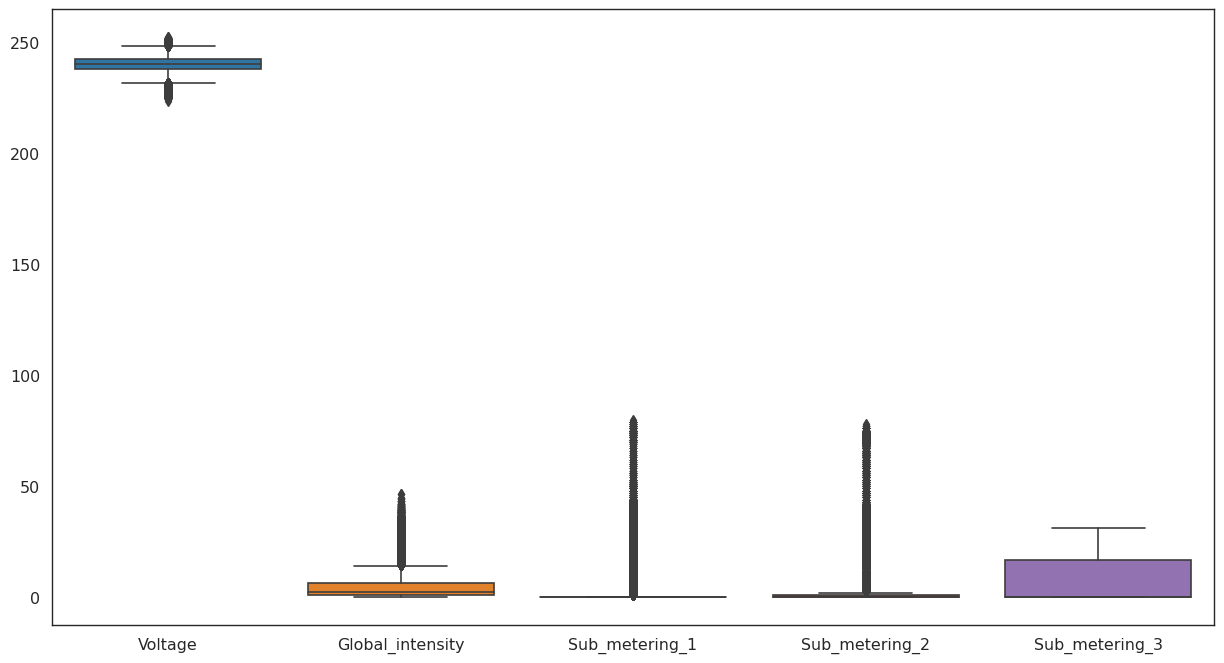

In [ ]:
#  Plotting Boxplot For Checking Median & Mean Values To Fill Null Values.
plt.figure(figsize=(15,8))
sns.boxplot(data=power.iloc[:,4:])

<Axes: >

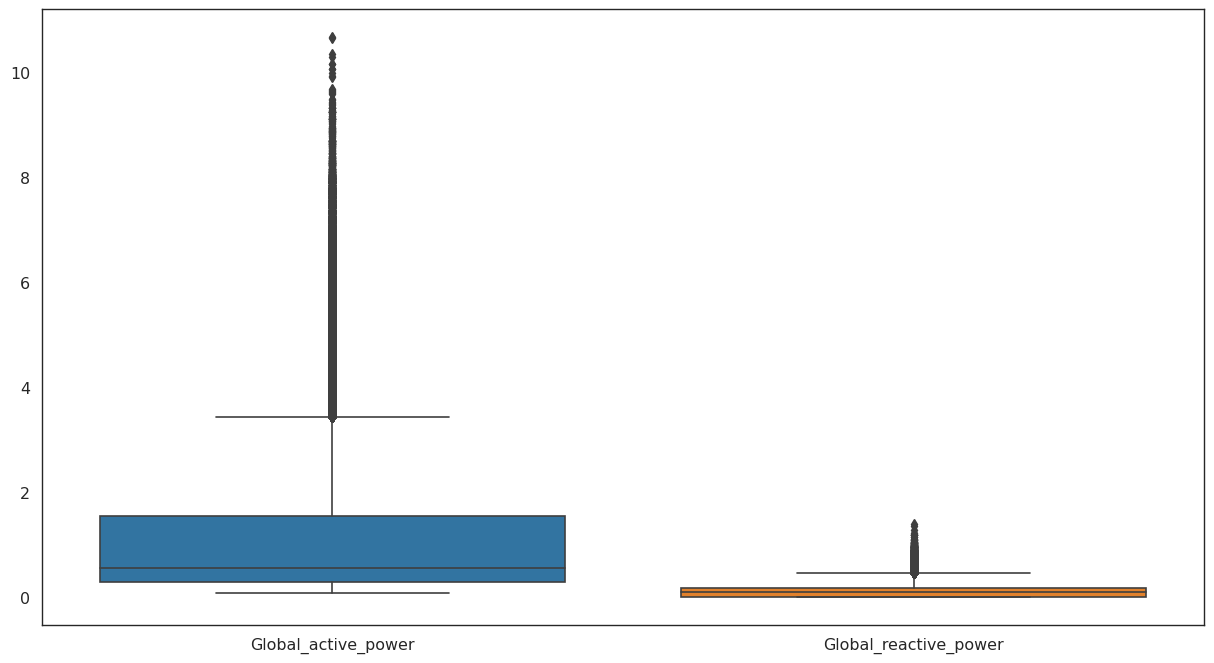

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=power.iloc[:,2:4])

In [ ]:
for j in range(0, 7):
    column_mean = power.iloc[:, j].apply(pd.to_numeric, errors='coerce').mean()
    power.iloc[:, j] = power.iloc[:, j].fillna(column_mean)

In [ ]:
#  Another Sanity Check To Make Sure That There Are Not More Any nan
power.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2           4069
Sub_metering_3           4069
dtype: int64

In [ ]:
print(power.columns)


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


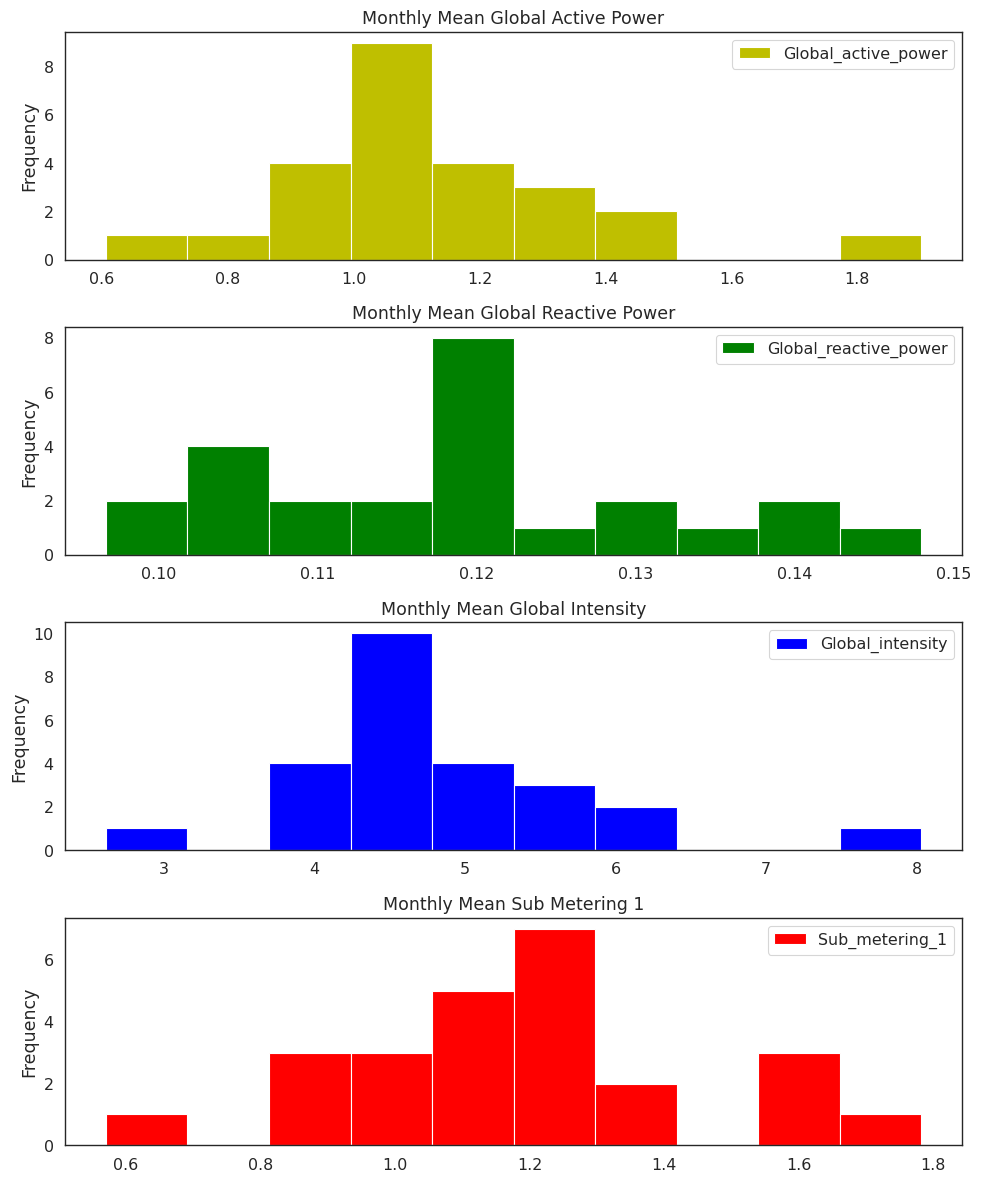

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Combine 'Date' and 'Time' columns into a single 'DateTime' column
power['DateTime'] = pd.to_datetime(power['Date'] + ' ' + power['Time'])

# Set the 'DateTime' column as the index
power.set_index('DateTime', inplace=True)

# Resample the data to get the mean values over monthly intervals for each variable
monthly_mean_power = power['Global_active_power'].resample('M').mean()
monthly_mean_reactive_power = power['Global_reactive_power'].resample('M').mean()
monthly_mean_intensity = power['Global_intensity'].resample('M').mean()
monthly_mean_sub_metering_1 = power['Sub_metering_1'].resample('M').mean()

# Create separate subplots for each variable
fig, axes = plt.subplots(4, 1, figsize=(10, 12))

# Plot histograms on each subplot
monthly_mean_power.plot(kind='hist', color='y', legend=True, ax=axes[0])
axes[0].set_title('Monthly Mean Global Active Power')

monthly_mean_reactive_power.plot(kind='hist', color='g', legend=True, ax=axes[1])
axes[1].set_title('Monthly Mean Global Reactive Power')

monthly_mean_intensity.plot(kind='hist', color='b', legend=True, ax=axes[2])
axes[2].set_title('Monthly Mean Global Intensity')

monthly_mean_sub_metering_1.plot(kind='hist', color='r', legend=True, ax=axes[3])
axes[3].set_title('Monthly Mean Sub Metering 1')

plt.tight_layout()
plt.show()


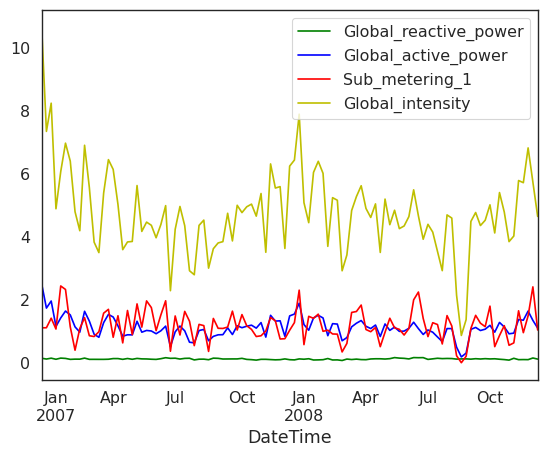

In [ ]:
#  Resampling Over Week & Computing Mean
power.Global_reactive_power.resample('W').mean().plot(color='g', legend=True)
power.Global_active_power.resample('W').mean().plot(color='b', legend=True)
power.Sub_metering_1.resample('W').mean().plot(color='r', legend=True)
power.Global_intensity.resample('W').mean().plot(color='y', legend=True)
plt.show()

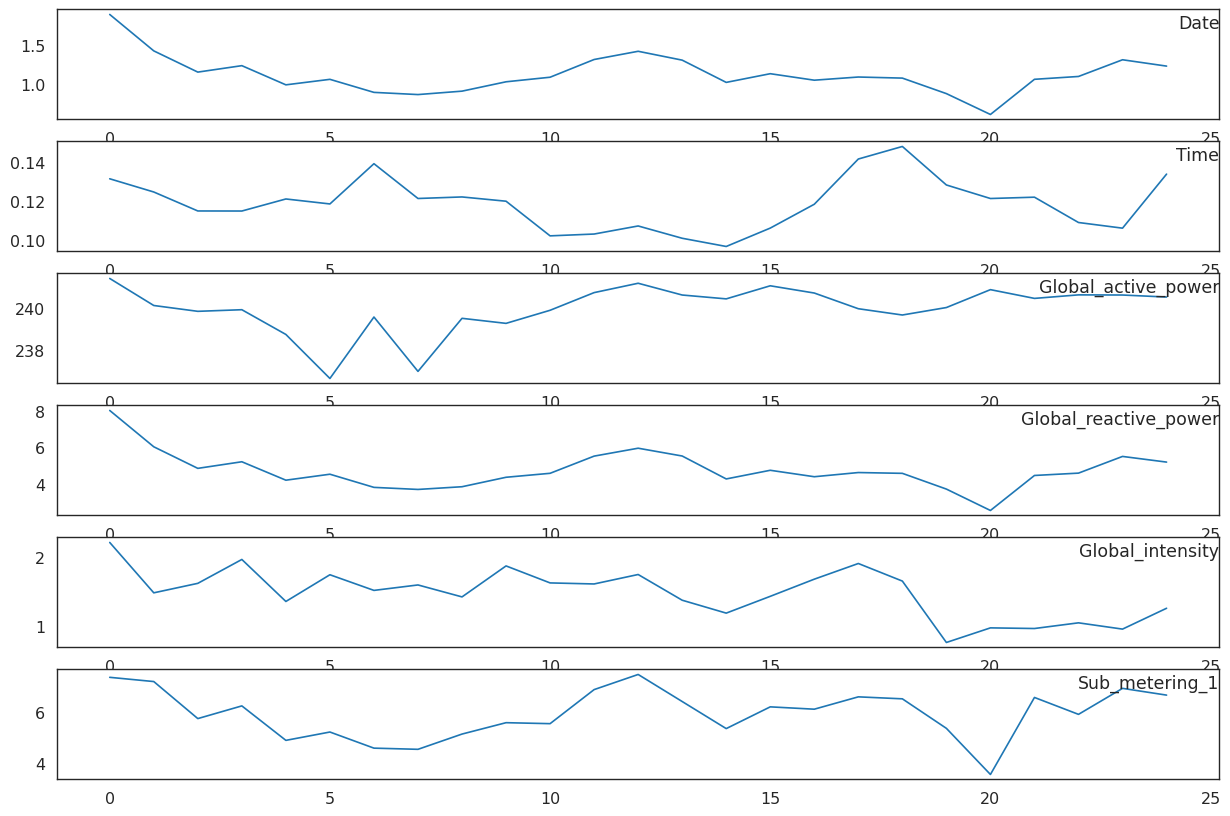

In [ ]:
#  Resampling Over Month & Computing Mean
#  Specifying Columns To Plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('M').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1

plt.show()

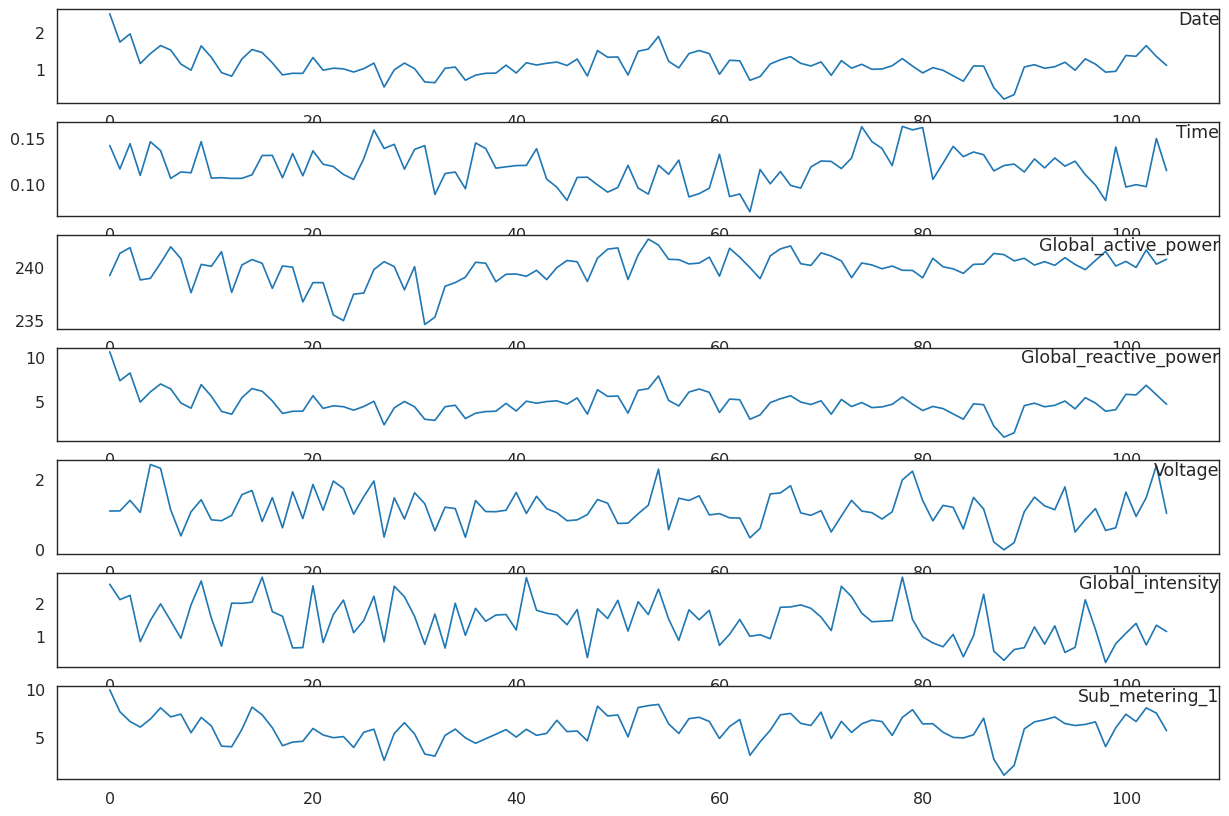

In [ ]:
#  Resampling Over Week & Computing Mean
cols = [0, 1, 2, 3,4, 5, 6]
i = 1
groups=cols
values = power.resample('W').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1

plt.show()

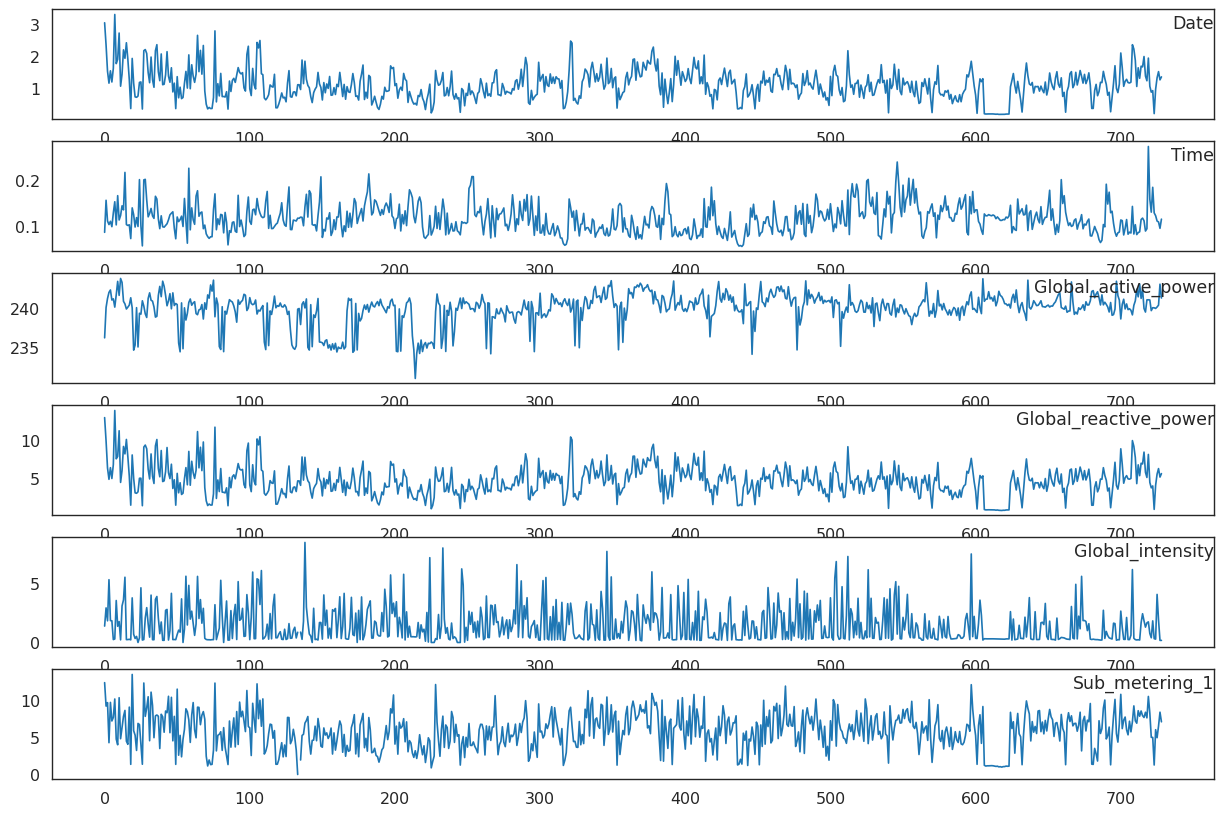

In [ ]:
#  Comparing The Mean of Different Features Resampled Over Day
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('D').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [ ]:
week_info = power.resample('W')
week = week_info.sum()

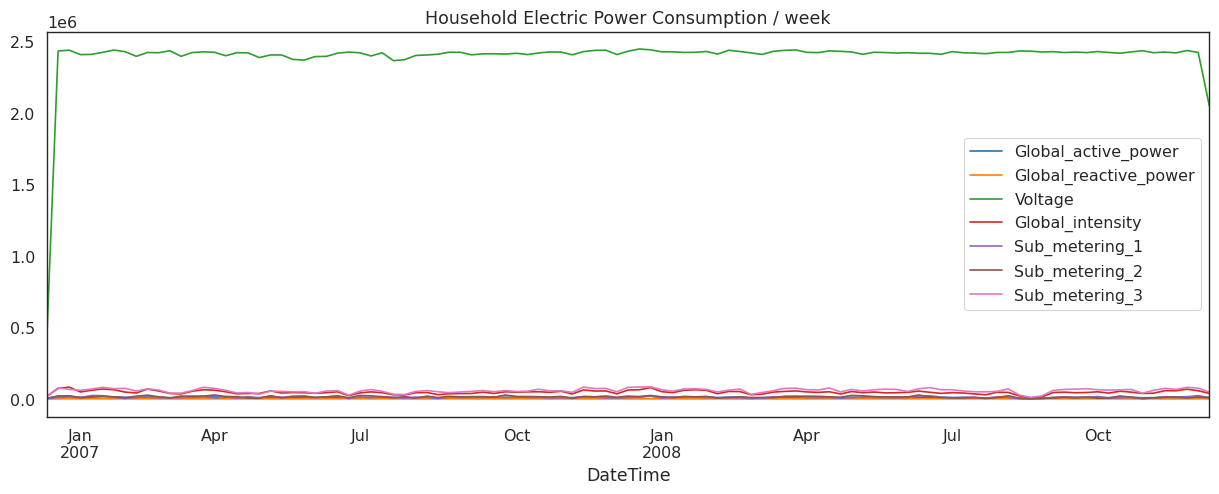

In [ ]:
x = week.plot(title='Household Electric Power Consumption / week', figsize=(15,5))

In [ ]:
daily_info = power.resample('D')
day = daily_info.sum()

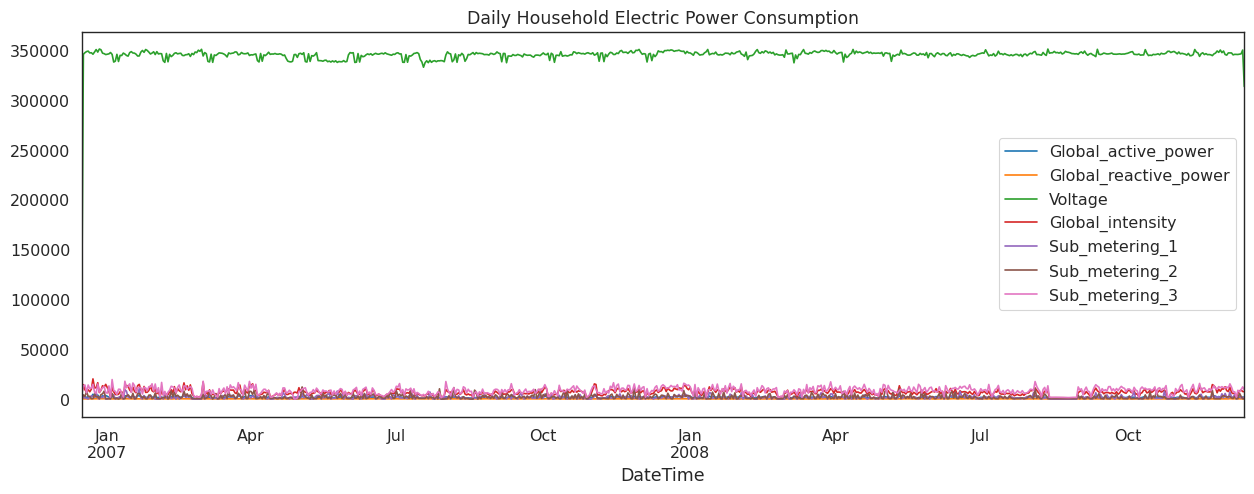

In [ ]:
y = day.plot(title='Daily Household Electric Power Consumption', figsize=(15,5))

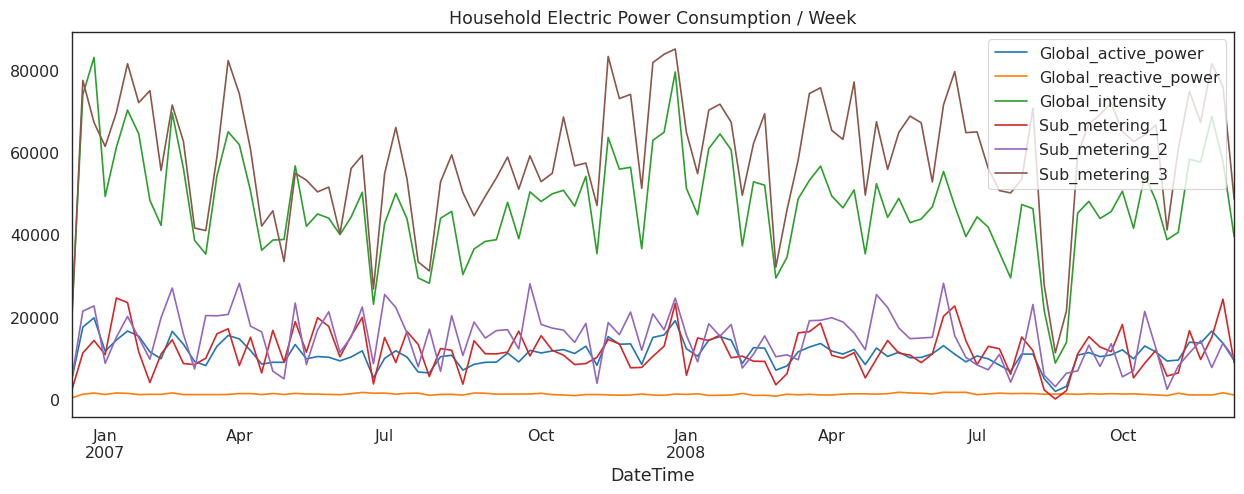

In [ ]:
week_data = week.drop(columns=['Voltage'])
a = week_data.plot(title='Household Electric Power Consumption / Week', figsize=(15,5))

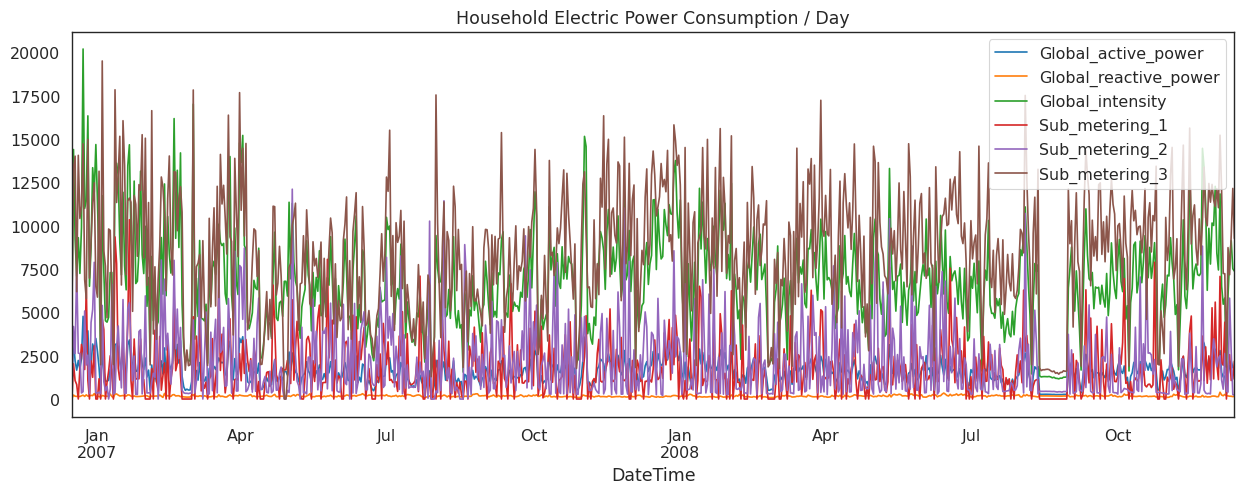

In [ ]:
daily_data = day.drop(columns=['Voltage'])
b = daily_data.plot(title='Household Electric Power Consumption / Day', figsize=(15,5))

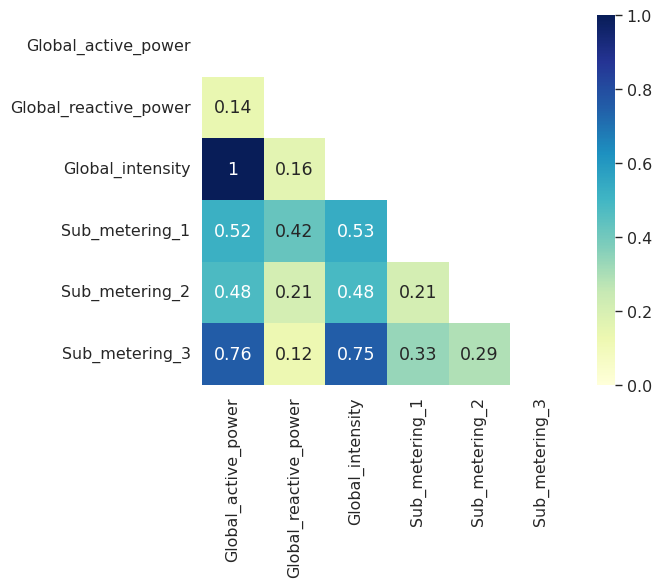

In [ ]:
p = daily_data.corr(method='pearson')
mask = np.zeros_like(p)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(p, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

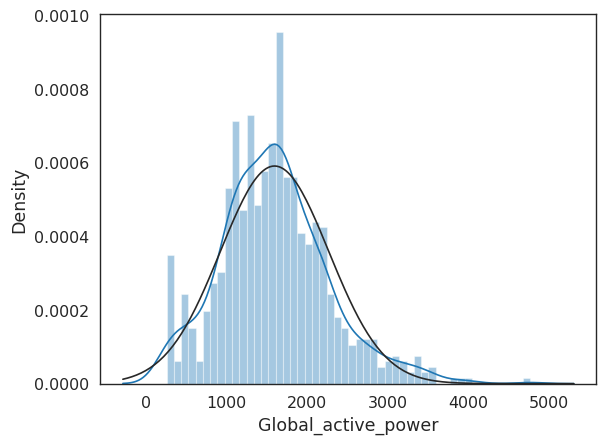

In [ ]:
z = sns.distplot(daily_data['Global_active_power'], fit=norm, bins=50, kde=True);

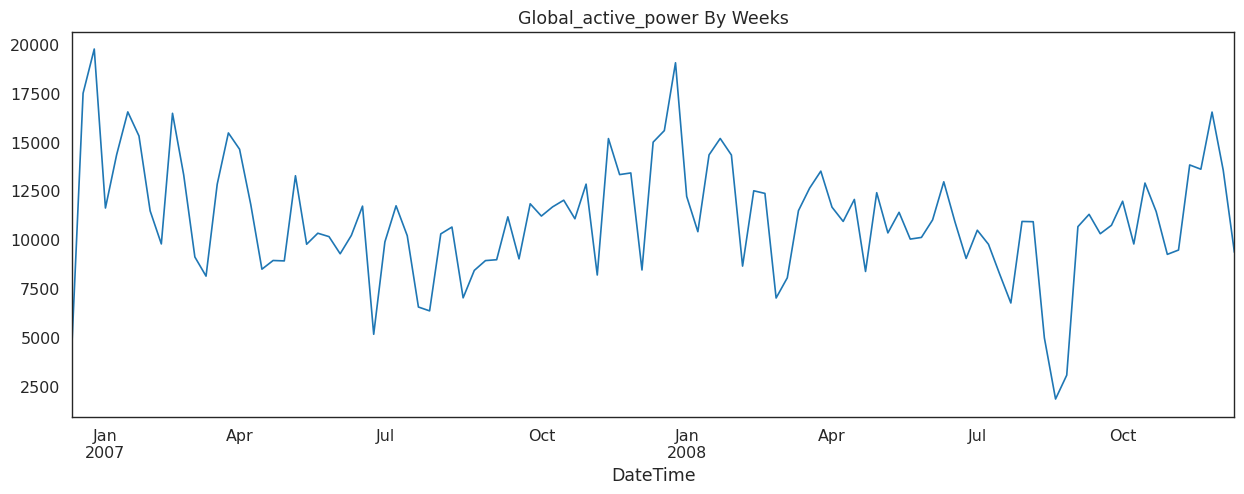

In [ ]:
c = week_data.Global_active_power.plot(title='Global_active_power By Weeks', figsize=(15,5))

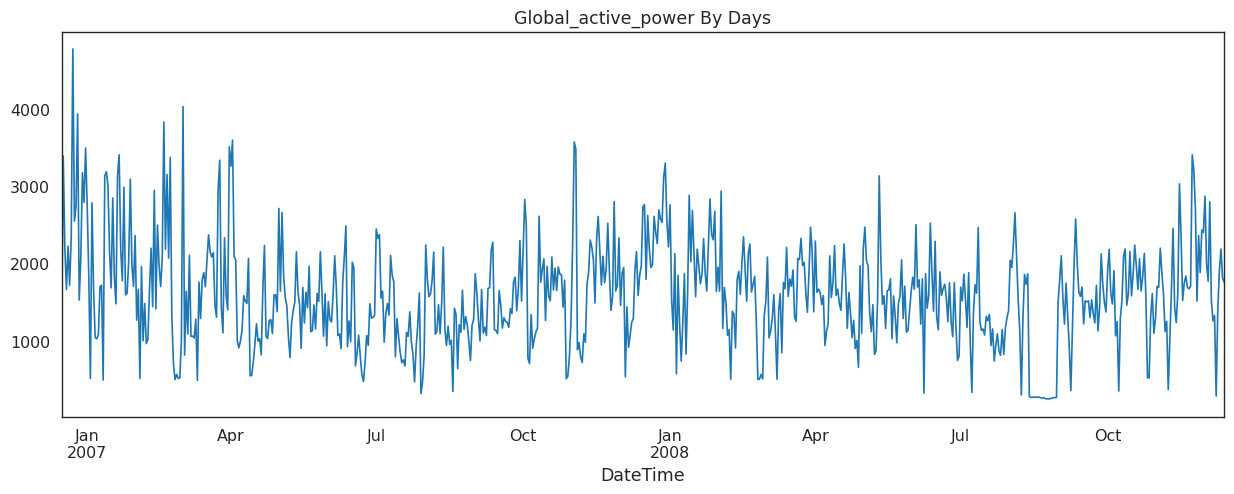

In [ ]:
d = daily_data.Global_active_power.plot(title='Global_active_power By Days', figsize=(15,5))

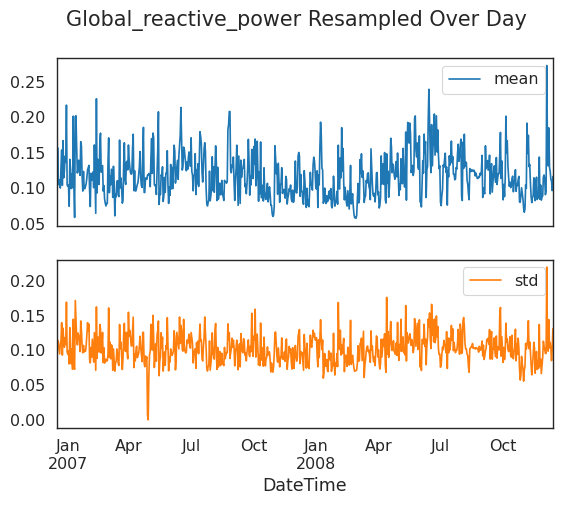

In [ ]:
#  Standard Deviation & Mean of 'Global_reactive_power' Resampled Over Day
x1 = power.Global_reactive_power.resample('D').agg(['mean', 'std'])
x1.plot(subplots = True, title='Global_reactive_power Resampled Over Day')
plt.show()

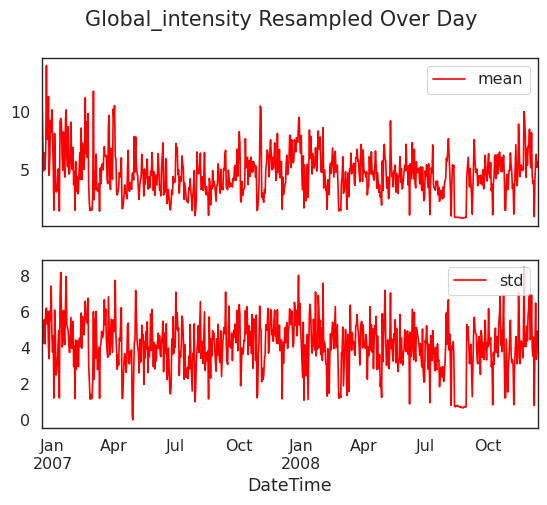

In [ ]:
#  Standard Deviation & Mean of 'Global_intensity' Resampled Over Day
x2 = power.Global_intensity.resample('D').agg(['mean', 'std'])
x2.plot(subplots = True, title='Global_intensity Resampled Over Day', color='red')
plt.show()

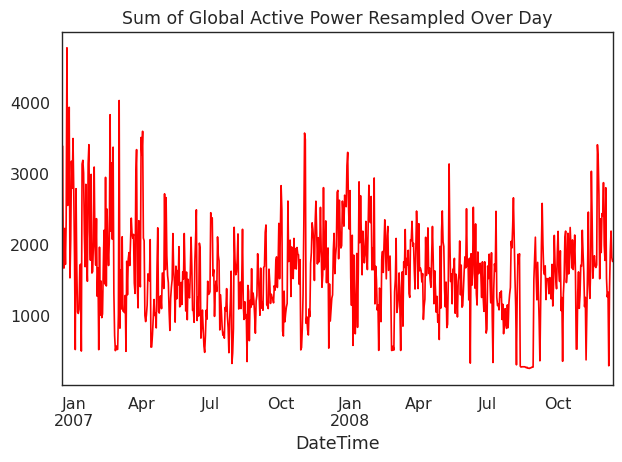

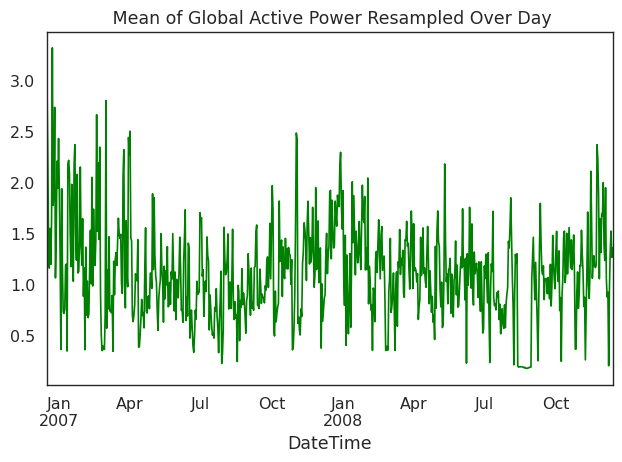

In [ ]:
#  Resampling Over Day, & Showing The Mean & Sum of Global_active_power
power.Global_active_power.resample('D').sum().plot(title='Sum of Global Active Power Resampled Over Day', color='red')
plt.tight_layout()
plt.show()

power.Global_active_power.resample('D').mean().plot(title=' Mean of Global Active Power Resampled Over Day', color='green')
plt.tight_layout()
plt.show()

In [ ]:
#  Calculating Power Consumed Per Month
#  Global_reactive_power
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().tail()

DateTime
2008-08-31    5413.726273
2008-09-30    5268.454000
2008-10-31    4864.698509
2008-11-30    4582.460273
2008-12-31    2485.474546
Freq: M, Name: Global_reactive_power, dtype: float64

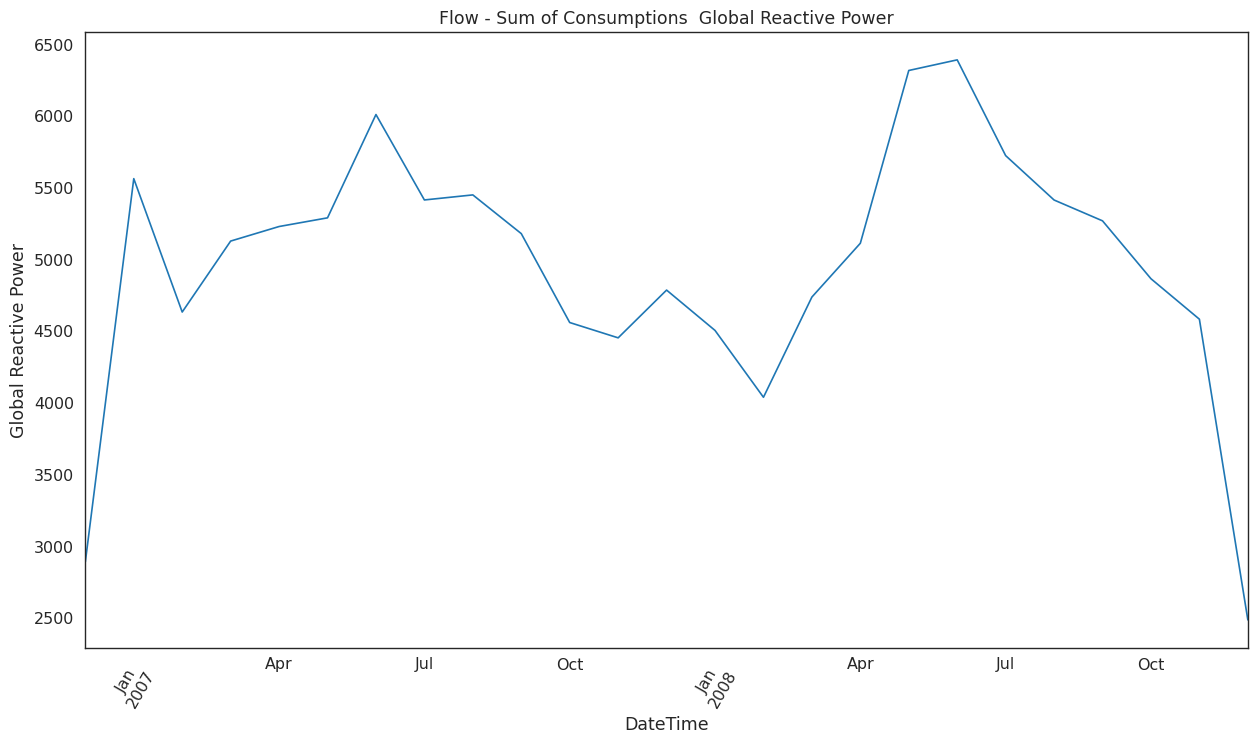

In [ ]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Flow - Sum of Consumptions  Global Reactive Power')
plt.show()

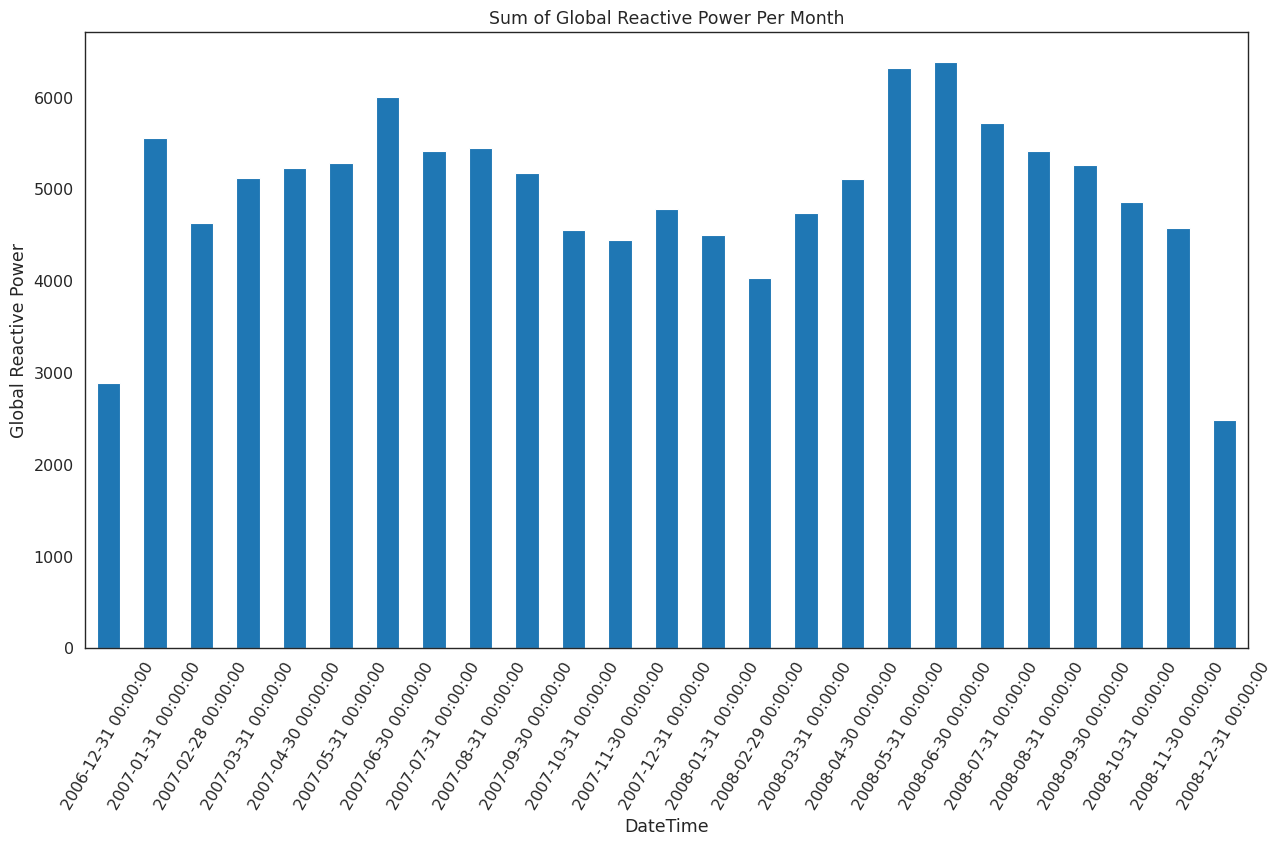

In [ ]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Sum of Global Reactive Power Per Month')
plt.show()

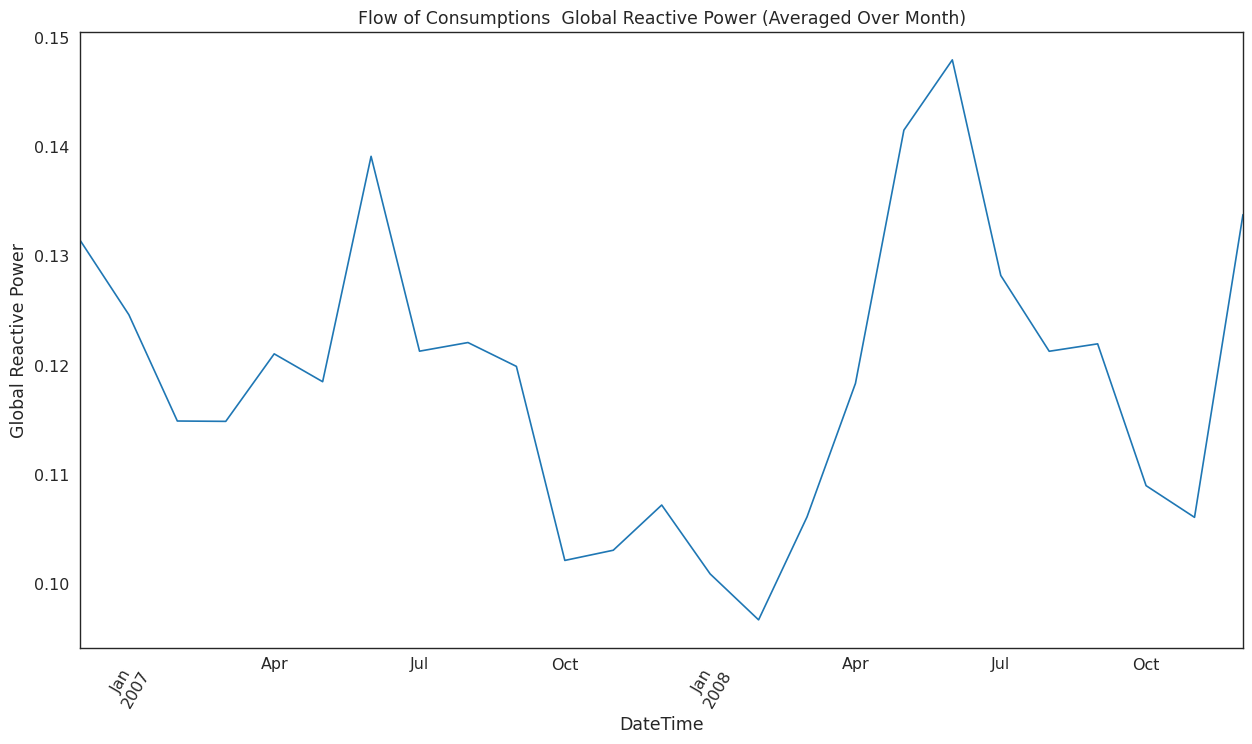

In [ ]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Mean of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Flow of Consumptions  Global Reactive Power (Averaged Over Month)')
plt.show()

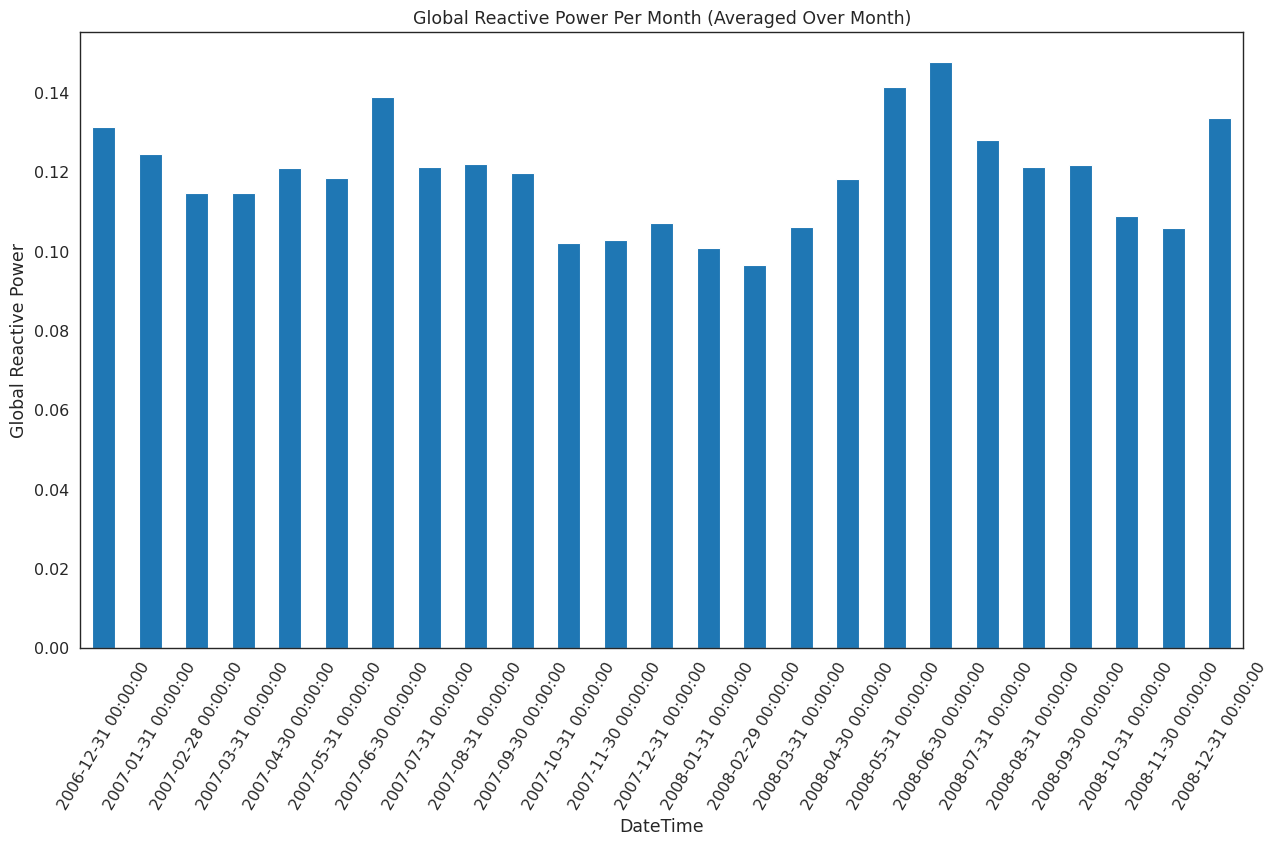

In [ ]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Mean of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Global Reactive Power Per Month (Averaged Over Month)')
plt.show()

In [ ]:
#  Global_active_power
# Sum of 'Global_active_power' Resampled Over Month
power['Global_active_power'].resample('M').sum().tail()

DateTime
2008-08-31    27064.162202
2008-09-30    45862.270000
2008-10-31    49034.082058
2008-11-30    56792.658202
2008-12-31    22899.100404
Freq: M, Name: Global_active_power, dtype: float64

In [ ]:
#  Mean of 'Global_active_power' Resampled Over Month
power['Global_active_power'].resample('M').mean().tail()

DateTime
2008-08-31    0.606276
2008-09-30    1.061627
2008-10-31    1.098434
2008-11-30    1.314645
2008-12-31    1.232526
Freq: M, Name: Global_active_power, dtype: float64

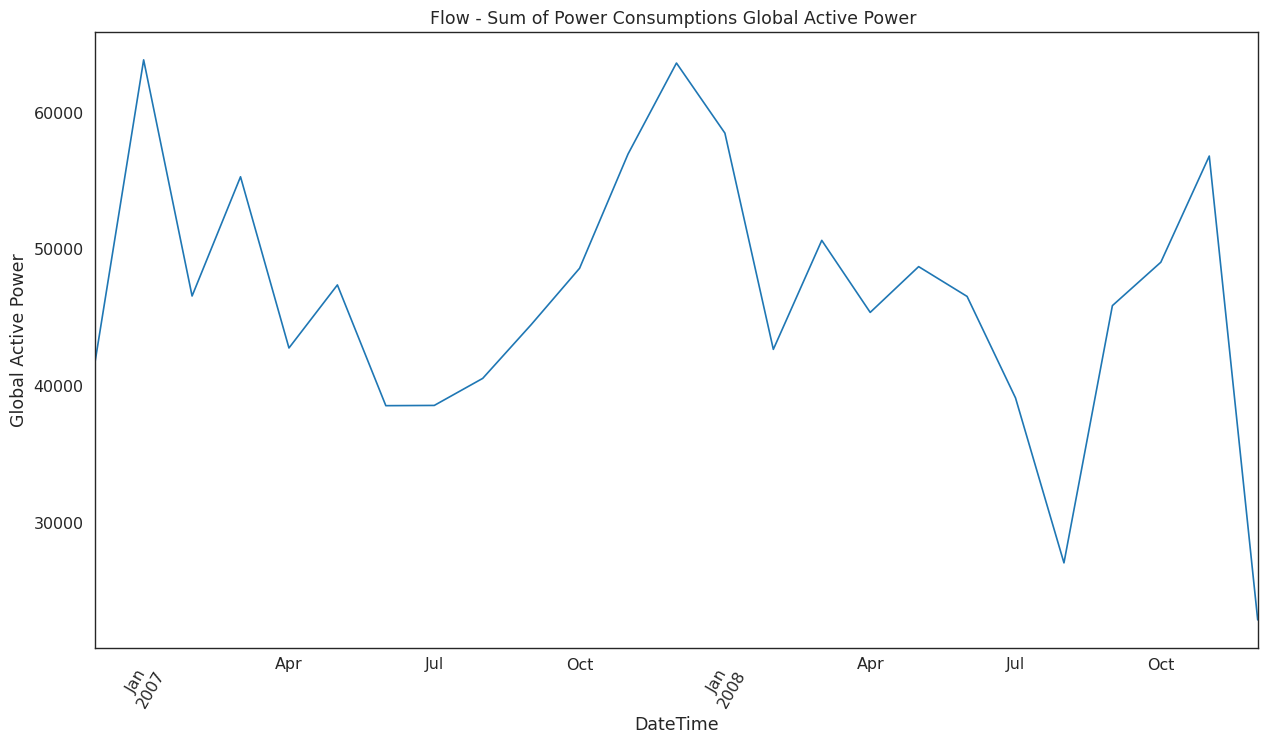

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').sum().plot(kind='line')  #  Sum of 'Global_active_power' Resampled Over Month
#  Sequence Values To Use For The xticks
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Flow - Sum of Power Consumptions Global Active Power ')
plt.show()

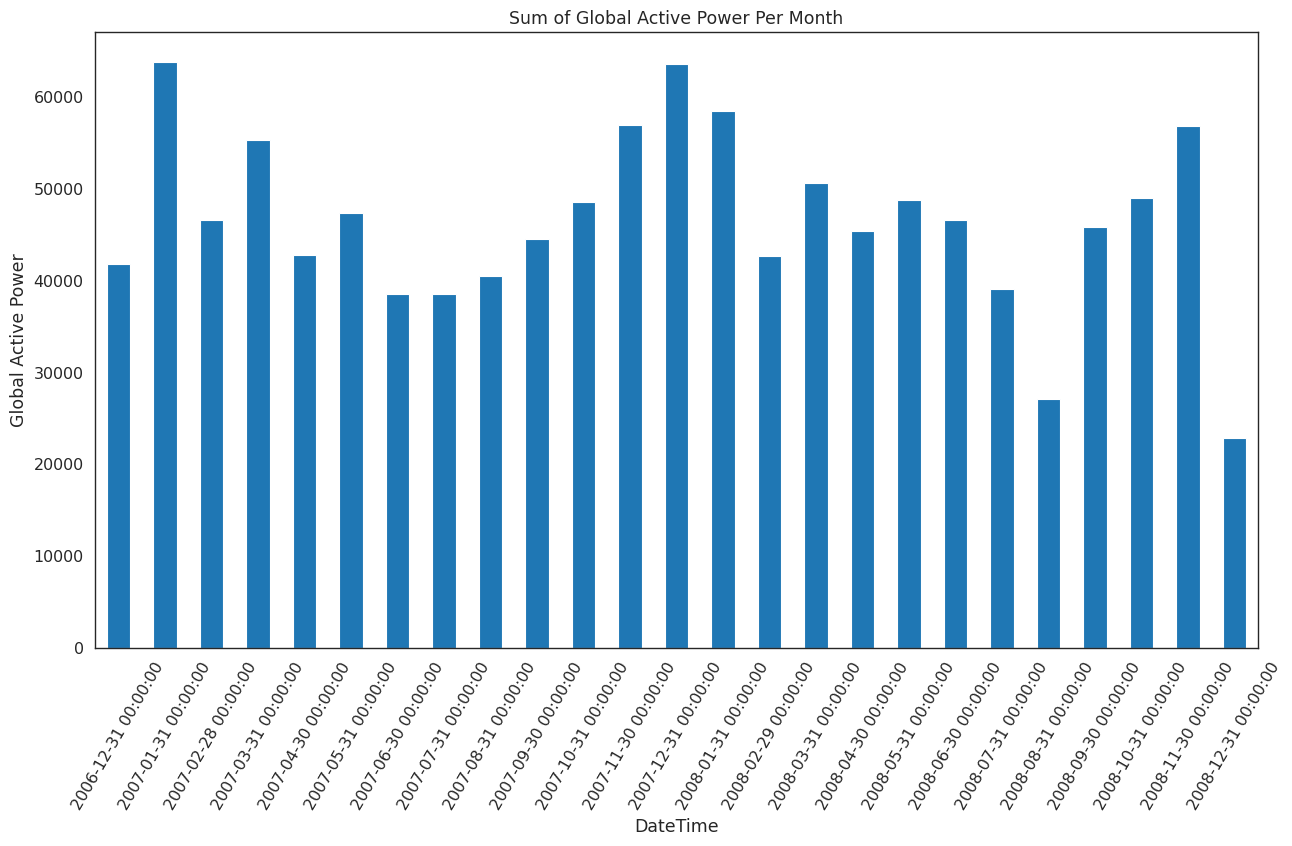

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').sum().plot(kind='bar')  #  Sum of 'Global_active_power' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Sum of Global Active Power Per Month')
plt.show()

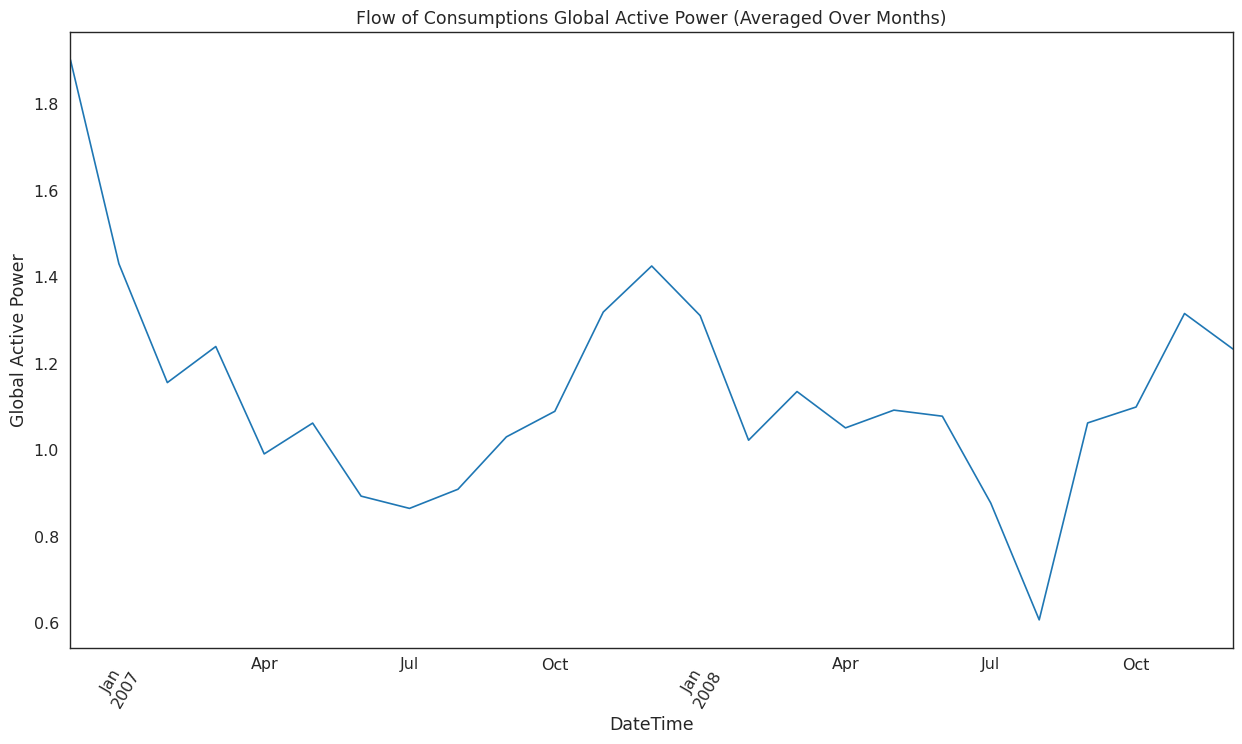

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').mean().plot(kind='line')  #  Mean of 'Global_active_power' Resampled Over Month
#  Sequence Values To Use For The xticks
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Flow of Consumptions Global Active Power (Averaged Over Months)')
plt.show()

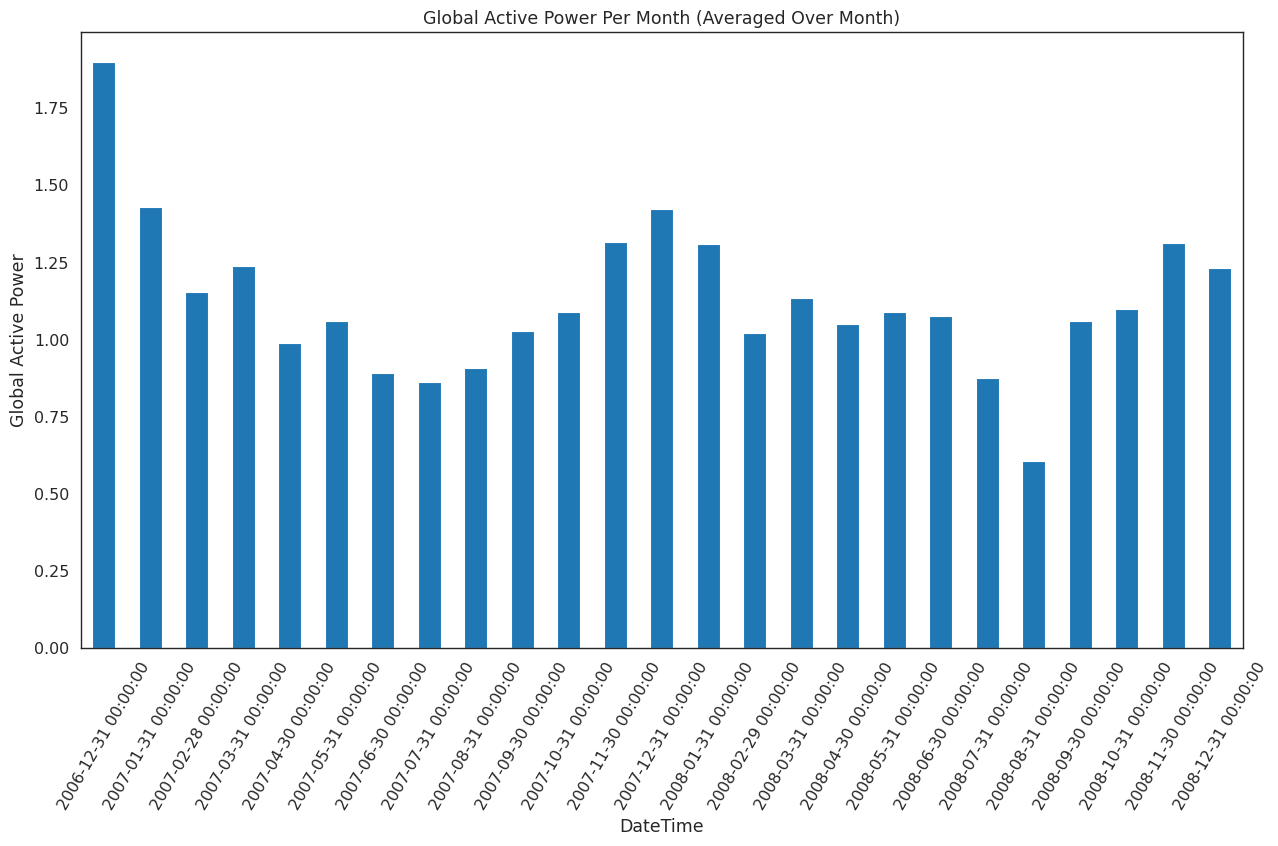

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').mean().plot(kind='bar')  #  Mean of 'Global_active_power' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Month (Averaged Over Month)')
plt.show()

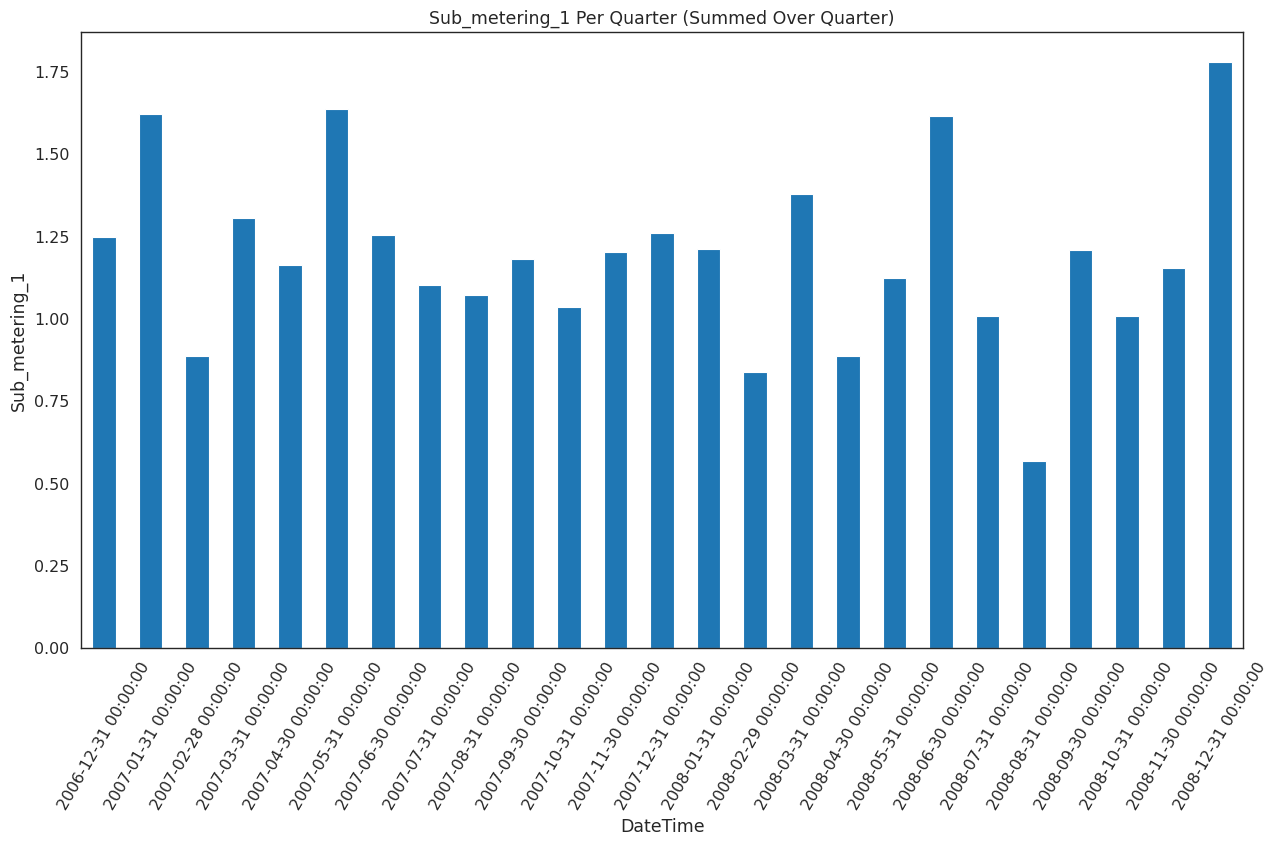

In [ ]:
plt.figure(figsize=(15,8))
power['Sub_metering_1'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 Per Quarter (Summed Over Quarter)')
plt.show()

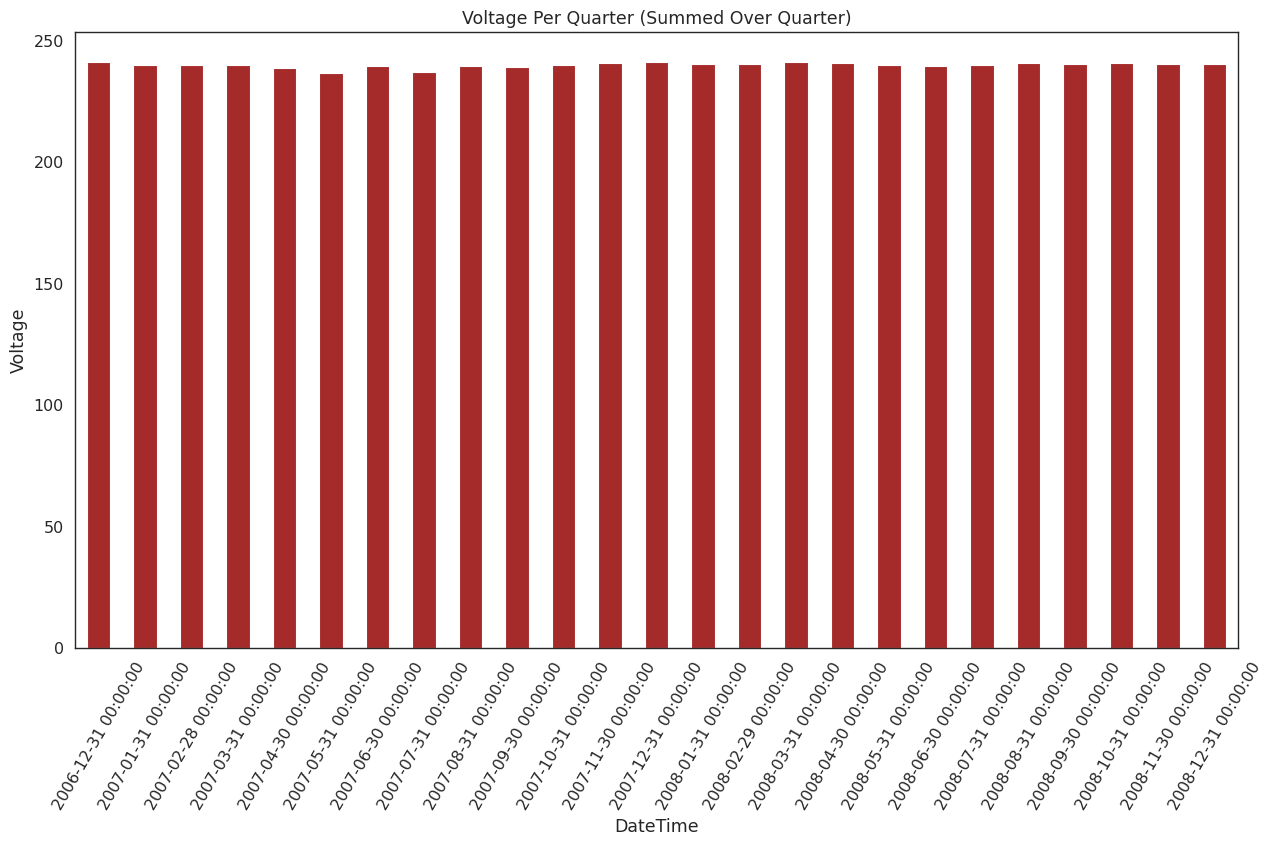

In [ ]:
plt.figure(figsize=(15,8))
power['Voltage'].resample('M').mean().plot(kind='bar', color='brown')  #  Mean of 'Voltage' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage Per Quarter (Summed Over Quarter)')
plt.show()

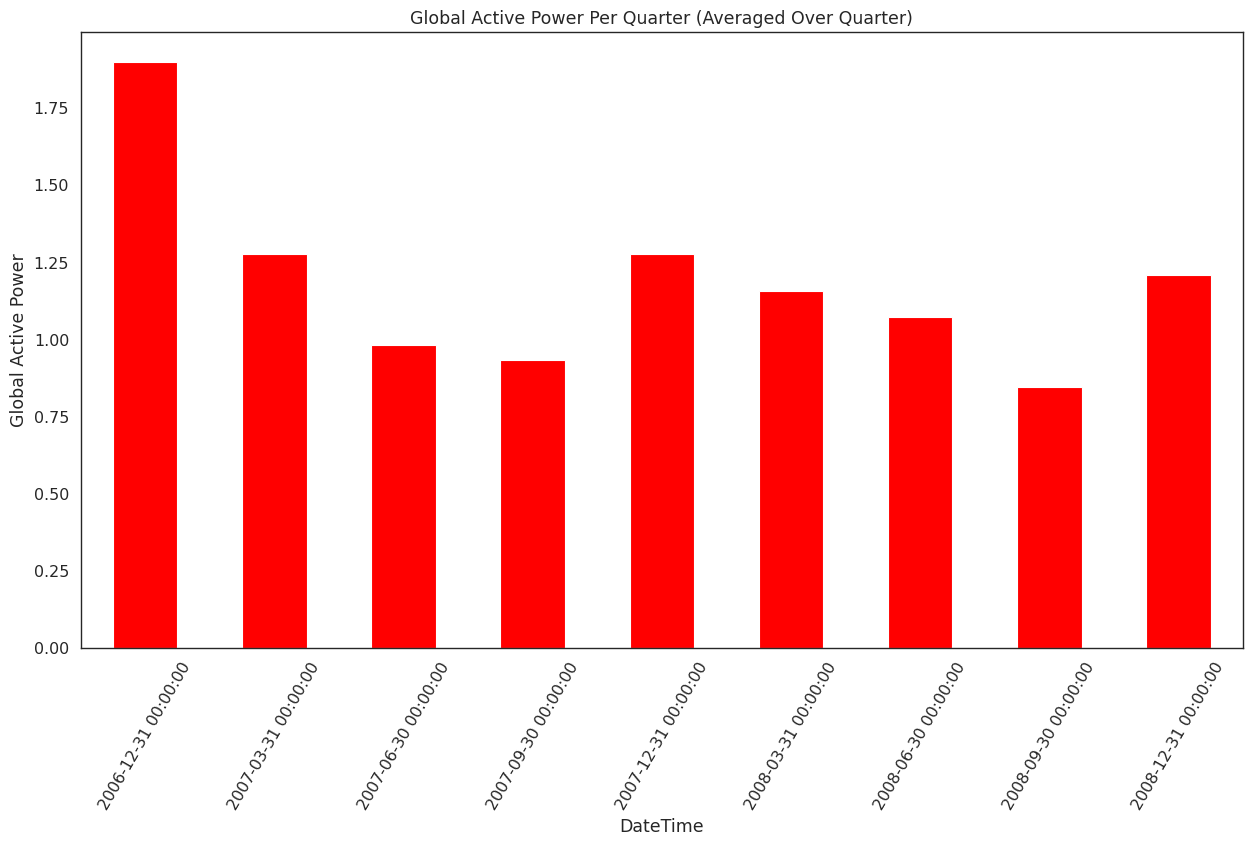

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('Q').mean().plot(kind='bar', color='red')  #  Mean of 'Global_active_power' Resampled Over Quarter
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Quarter (Averaged Over Quarter)')
plt.show()

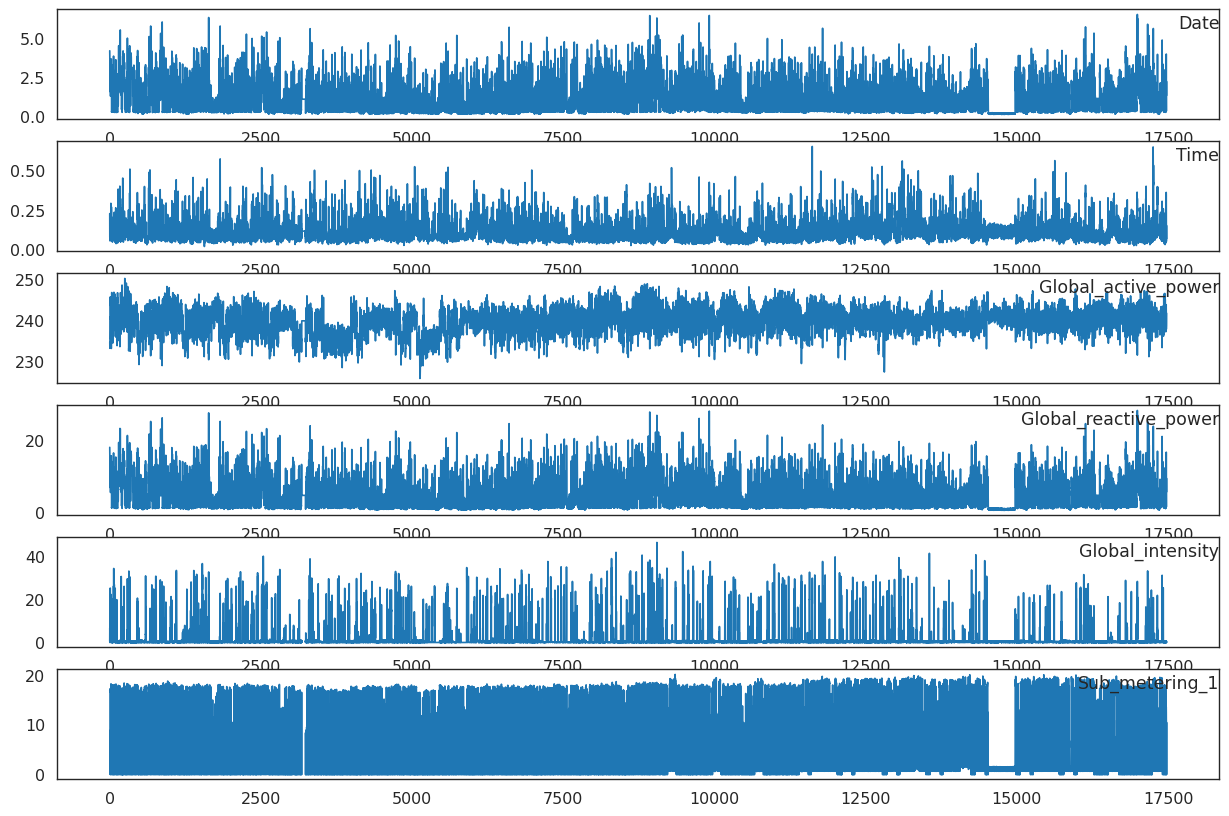

In [ ]:
#  Resampling Over Hour & Computing Mean
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('h').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [ ]:
#  Dropping Feature: Voltage
power.drop(['Voltage'],1,inplace=True)

In [ ]:
def data_prep(data, n_in=1, n_out=1, dropnan=True):
    names, cols = list(), list()
    data_frame = pd.DataFrame(data)
    n = 1 if type(data) is list else data.shape[1]

    for x in range(n_in, 0, -1):  #  Input Sequence (t-n, ... t-1)
        cols.append(data_frame.shift(x))
        names += [('var%d(t-%d)' % (y+1, x)) for y in range(n)]

    for x in range(0, n_out):  #  Forecast Sequence (t, t+1, ... t+n)
        cols.append(data_frame.shift(-x))
        if x == 0:
            names += [('var%d(t)' % (y+1)) for y in range(n)]
        else:
            names += [('var%d(t+%d)' % (y+1, x)) for y in range(n)]

    z = pd.concat(cols, axis=1)  #  Putting It All Together
    z.columns = names

    if dropnan:  #  Dropping Rows With NaN Values
        z.dropna(inplace=True)
    return z

In [ ]:
#  Resampling of Data Over Hour
over_hour = power.resample('h').mean()
over_hour.shape

(17477, 6)

In [ ]:
over_hour.tail()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2008-12-13 17:00:00,2.755267,0.080133,11.676667,9.283333,0.033333,10.983333
2008-12-13 18:00:00,1.329000,0.068333,5.620000,0.000000,0.000000,0.000000
2008-12-13 19:00:00,2.258433,0.154367,9.503333,0.000000,0.550000,5.933333
2008-12-13 20:00:00,1.472700,0.087067,6.170000,0.000000,0.000000,10.483333
2008-12-13 21:00:00,0.367128,0.055333,1.605128,0.000000,0.000000,0.000000


In [ ]:
#  Training Based On The Resampled Data (Over Hour)
results = over_hour.values

In [ ]:
#  Normalizing Features
scaler = MinMaxScaler(feature_range=(0, 1))
s = scaler.fit_transform(results)
s.shape

(17477, 6)

In [ ]:
#  Framing As Supervised Learning
r = data_prep(s, 1, 1)
#  Dropping Columns which are not predicted
r.drop(r.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(r.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.636816   0.328524   0.631157        0.0   0.011366   0.838166  0.545045
2   0.545045   0.093202   0.541487        0.0   0.144652   0.838442  0.509006
3   0.509006   0.101416   0.502152        0.0   0.030869   0.829329  0.488550
4   0.488550   0.085409   0.481110        0.0   0.000000   0.834300  0.455597
5   0.455597   0.087884   0.449904        0.0   0.008973   0.855841  0.322555


In [ ]:
#  Splitting Into Train & Test Sets
results = r.values

In [ ]:
duration = 365 * 24
train = results[:duration, :]
test = results[duration:, :]

In [ ]:
#  Splitting Into Input & Outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [ ]:
# Rehaping The Input Into The 3D Format As Expected By LSTMs, Namely [samples, timesteps, features].
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  #  Reshaping Input To Be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8760, 1, 6) (8760,) (8652, 1, 6) (8652,)


In [ ]:
print ('X_train Shape : ',X_train.shape)
print ('y_train Shape : ',y_train.shape)
print ('X_test Shape : ',X_test.shape)
print ('y_test Shape : ',y_test.shape)

X_train Shape :  (8760, 1, 6)
y_train Shape :  (8760,)
X_test Shape :  (8652, 1, 6)
y_test Shape :  (8652,)


In [ ]:
#  LSTM Model Architecture
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 200)            165600    
                                                                 
 dropout (Dropout)           (None, 1, 200)            0         
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 486,601
Trainable params: 486,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  Fitting Network
history = model.fit(X_train, y_train, epochs = 100, batch_size = 70, validation_data = (X_test, y_test), verbose = 2, shuffle = False)

Epoch 1/100
126/126 - 6s - loss: 0.0178 - val_loss: 0.0106 - 6s/epoch - 47ms/step
Epoch 2/100
126/126 - 1s - loss: 0.0114 - val_loss: 0.0098 - 1s/epoch - 11ms/step
Epoch 3/100
126/126 - 1s - loss: 0.0110 - val_loss: 0.0097 - 1s/epoch - 11ms/step
Epoch 4/100
126/126 - 1s - loss: 0.0110 - val_loss: 0.0097 - 1s/epoch - 11ms/step
Epoch 5/100
126/126 - 1s - loss: 0.0108 - val_loss: 0.0097 - 1s/epoch - 11ms/step
Epoch 6/100
126/126 - 1s - loss: 0.0109 - val_loss: 0.0096 - 1s/epoch - 11ms/step
Epoch 7/100
126/126 - 1s - loss: 0.0108 - val_loss: 0.0096 - 1s/epoch - 11ms/step
Epoch 8/100
126/126 - 2s - loss: 0.0108 - val_loss: 0.0096 - 2s/epoch - 16ms/step
Epoch 9/100
126/126 - 2s - loss: 0.0108 - val_loss: 0.0096 - 2s/epoch - 13ms/step
Epoch 10/100
126/126 - 1s - loss: 0.0108 - val_loss: 0.0096 - 1s/epoch - 11ms/step
Epoch 11/100
126/126 - 2s - loss: 0.0107 - val_loss: 0.0095 - 2s/epoch - 16ms/step
Epoch 12/100
126/126 - 3s - loss: 0.0108 - val_loss: 0.0095 - 3s/epoch - 21ms/step
Epoch 13/100


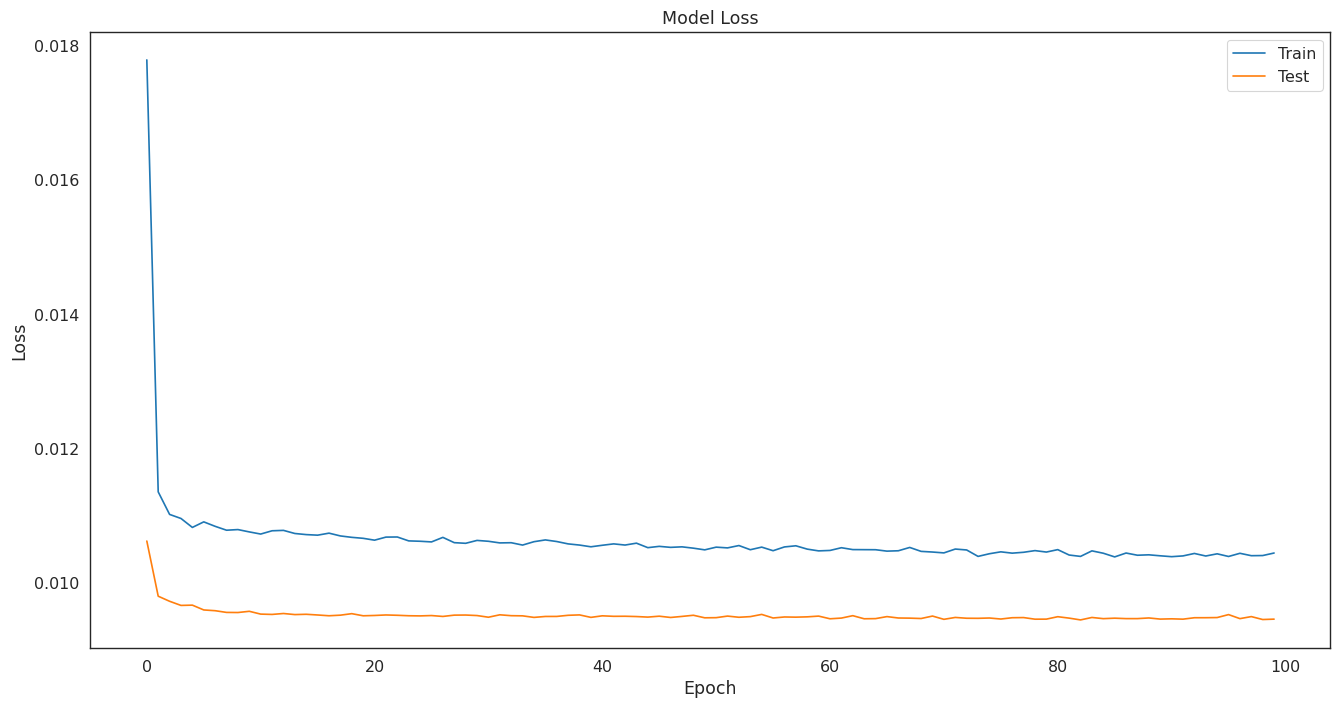

In [ ]:
#  Summarizing History For Loss
plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
#  Making A Prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 6))

271/271 [==============================] - 1s 2ms/step


In [ ]:
#  Inverting Scaling To Forecast
y_pred_i = np.concatenate((y_pred, X_test[:, -5:]), axis=1)
y_pred_i = scaler.inverse_transform(y_pred_i)
y_pred_i = y_pred_i[:,0]

In [ ]:
#  Inverting Scaling For Actual
y_test = y_test.reshape((len(y_test), 1))
y_i = np.concatenate((y_test, X_test[:, -5:]), axis=1)
y_i = scaler.inverse_transform(y_i)
y_i = y_i[:,0]

In [ ]:
#  Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_i, y_pred_i))
print('Test RMSE : %.3f' % rmse)

Test RMSE : 0.626


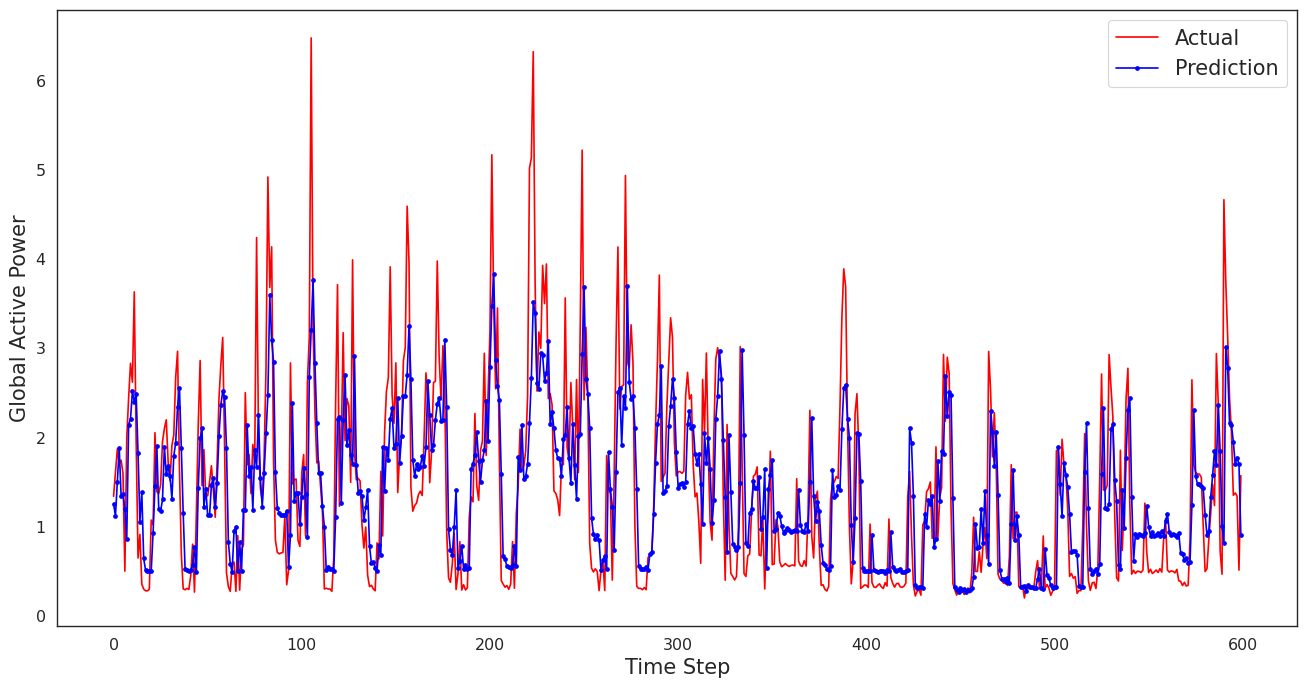

In [ ]:
#  Every Time Step is One Hour
#  Compairing The Predictions In 600 Hours
pq = [x for x in range(600)]
plt.figure(figsize = (16, 8))
plt.plot(pq, y_i[:600], 'r', label="Actual")
plt.plot(pq, y_pred_i[:600], marker='.', color='b', label="Prediction")
plt.ylabel('Global Active Power', size=15)
plt.xlabel('Time Step', size=15)
plt.legend(fontsize=15)
plt.show()